<h2 style="color:blue" align="center"> Polynomial Regression: CO2 Emission Prediction </h2>

## Problem

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. By using the dataset build a polynomial linear regression model perform relationship between $\textbf{"ENGINESIZE"}$, $\textbf{"FUELCONSUMPTION_COMB"}$ and $\textbf{"CO2EMISSIONS"}$. 


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Importing Needed packages


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Load and read dataset


In [14]:
df = pd.read_csv("E:\Python\ML_Learn\Linear Regression\Polynomial LR\FuelConsumptionCo2.csv")
df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


### Select some features in dataset


In [22]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Visualize to determine polynomial degree

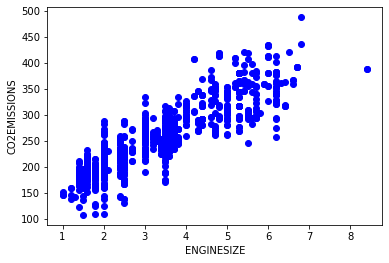

In [23]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

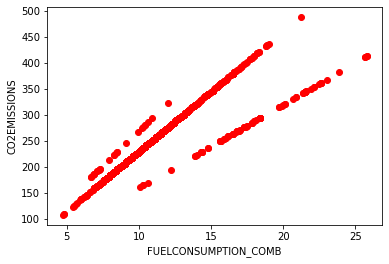

In [25]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color = "red")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [30]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynomial regression</h2>


In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

### **fit_transform** function 

Syntax: variablename1.**fit_transfrom**(variablename2)

Takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).
In this model, we will perform the relationship between **ENGINESIZE** and **CO2EMISSIONS** by quadratic so degree = 2.

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v_1\\
v_2\\
\vdots\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
 1 & v_1 & v_1^2\\
 1 & v_2 & v_2^2\\
\vdots & \vdots & \vdots\\
 1 & v_n & v_n^2
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\
2.4\\
1.5\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
 1 & 2. & 4.\\
 1 & 2.4 & 5.76\\
 1 & 1.5 & 2.25\\
\vdots & \vdots & \vdots\\
\end{bmatrix}
$$

So from that, by replace $v_1 = x_1$, $v_1^2 = x_2$ we come back to the multiple linear regression:
$$y = \omega_0 +\omega_1 x_1 + \omega_2 x_2  $$
Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such problems.

## Build polynomial regression with **ENGINESIZE**

### Quadratic Regression

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
#Create train series
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
#Create test series
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
poly = PolynomialFeatures(degree = 2) #Set quadratic regression
new_train_x = poly.fit_transform(train_x)
#Before transfer
print(train_x[:9])
#Before transfer
print(new_train_x[:9,:])

[[2. ]
 [2.4]
 [1.5]
 [3.5]
 [3.5]
 [3.5]
 [3.5]
 [3.7]
 [2.4]]
[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 [ 1.    3.5  12.25]
 [ 1.    3.5  12.25]
 [ 1.    3.5  12.25]
 [ 1.    3.5  12.25]
 [ 1.    3.7  13.69]
 [ 1.    2.4   5.76]]


**By now, use the transformed matrix to train similar to multiple linear regression.**

In [77]:
reg = linear_model.LinearRegression()
reg.fit(new_train_x,train_y)
print(reg.coef_)
print(reg.intercept_)

[[ 0.         52.78712103 -1.81182914]]
[103.32219973]


### Visualize fitting quadratic line

Text(0, 0.5, 'Emission')

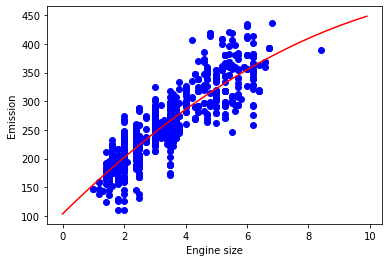

In [86]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = reg.intercept_[0]+ reg.coef_[0][1]*XX+ reg.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation with testset</h2> 


In [79]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
8,3.7,6,11.6,267
9,2.4,4,9.2,212
11,3.5,6,10.4,239
17,4.7,8,15.4,354
18,5.9,12,15.6,359
...,...,...,...,...
1036,2.0,4,9.4,216
1044,1.8,4,8.6,198
1047,3.6,6,10.8,248
1058,3.0,6,11.5,264


### Compare testset output and predict output

In [75]:
y_hat = reg.predict(new_test_x)
d = {"ENGINESIZE":np.reshape(test["ENGINESIZE"],np.size(test["ENGINESIZE"])) ,"CO2EMISSIONS": np.reshape(test_y,np.size(test_y)),"CO2EMISSIONS PREDICT":np.reshape(y_hat,np.size(y_hat))}
compare = pd.DataFrame(data = d)
compare

,ENGINESIZE,CO2EMISSIONS,CO2EMISSIONS PREDICT
8,3.7,267,273.830607
9,2.4,212,219.575154
11,3.5,239,265.882216
17,4.7,354,311.398363
18,5.9,359,351.696442
...,...,...,...
1036,2.0,216,201.649125
1044,1.8,198,192.468691
1047,3.6,248,269.874530
1058,3.0,264,245.377101


### EVALUATION ACCURACY

In [88]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat,test_y))

Mean absolute error: 23.76
Residual sum of squares (MSE): 995.65
R2-score: 0.68


### Cubic Regression

In [67]:
poly3 = PolynomialFeatures(degree = 3)
train_x3 = poly3.fit_transform(train_x)
reg3 = linear_model.LinearRegression()
reg3.fit(train_x3, train_y)
print(reg3.coef_)
print(reg3.intercept_)

[[ 0.         28.40503897  5.03375721 -0.57986775]]
[128.83963118]


### Visualize fitting cubic line

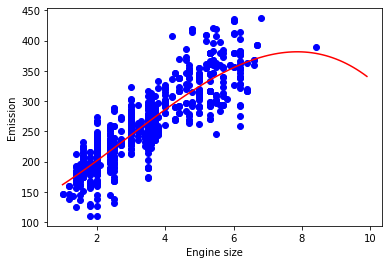

In [71]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
x_3= np.arange(1,10,0.1)
y_3 = reg3.intercept_ + reg3.coef_[0][1] * x_3 + reg3.coef_[0][2] * (x_3**2) + reg3.coef_[0][3] * (x_3**3)
plt.plot(x_3,y_3,color = "red" )
plt.show()

### Compare testset output and predict output

In [84]:
new_test_x3 = poly3.fit_transform(test_x)
new_test_x3
y_hat3 = reg3.predict(new_test_x3)
d = {"ENGINESIZE":np.reshape(test["ENGINESIZE"],np.size(test["ENGINESIZE"])) ,"CO2EMISSIONS": np.reshape(test_y,np.size(test_y)),"CO2EMISSIONS PREDICT":np.reshape(y_hat3,np.size(y_hat3))}
compare3 = pd.DataFrame(data = d)
compare3

,ENGINESIZE,CO2EMISSIONS,CO2EMISSIONS PREDICT
8,3.7,267,273.478371
9,2.4,212,217.990074
11,3.5,239,265.058964
17,4.7,354,313.335402
18,5.9,359,352.561791
...,...,...,...
1036,2.0,216,201.145796
1044,1.8,198,192.896286
1047,3.6,248,269.280955
1058,3.0,264,243.702134


### EVALUATION ACCURACY

In [89]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat3,test_y))

Mean absolute error: 23.60
Residual sum of squares (MSE): 996.91
R2-score: 0.68
